#**C-DAC Mumbai - case Study - EDA**

##Problem Statement: Uncovering Patterns in Hotel Booking Data for Operational Efficiency and Revenue Growth


In [95]:
import numpy as np
import pandas as pd
from numpy import random
from numpy.linalg import inv
import os
import scipy
from scipy import stats
from collections import Counter
from scipy.stats import skew, kurtosis, poisson, binom, expon, norm, t,f
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import legend
from statsmodels.stats.weightstats import ztest
from statsmodels import stats
from statsmodels.stats import weightstats as ssw
pd.set_option('display.max_columns',None)
import statsmodels.stats.multicomp
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from statsmodels.stats import weightstats as ssw
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats import proportion as ssp
from statsmodels.stats.rates import test_poisson
from statsmodels.stats import rates
from statsmodels.stats.rates import test_poisson_2indep
from sklearn.preprocessing import LabelEncoder


## Scope of Work:
1.  Data Cleaning and Preprocessing

Handle missing values in columns


In [133]:
df = pd.read_csv('/content/hotel_bookings.csv')

In [97]:
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [98]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [100]:
df.shape

(119390, 32)

In [101]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [102]:
# df['country'].value_counts()
df['country'].isnull().sum()

np.int64(488)

In [103]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

<ipython-input-103-0e353cbf29c3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


In [104]:
df['country'].isnull()

,country
0,False
1,False
2,False
3,False
4,False
...,...
119385,False
119386,False
119387,False
119388,False


In [105]:
mean_value = df['country'].mode()
print(mean_value)

0    PRT
Name: country, dtype: object


In [106]:
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [107]:
df['agent'] = df['agent'].fillna(df['agent'].mean())

In [108]:
df['agent'].isnull()

,agent
0,False
1,False
2,False
3,False
4,False
...,...
119385,False
119386,False
119387,False
119388,False


In [109]:
df['agent']

,agent
0,86.693382
1,86.693382
2,86.693382
3,304.000000
4,240.000000
...,...
119385,394.000000
119386,9.000000
119387,9.000000
119388,89.000000


In [110]:
mean_value = df['agent'].mean()
print(mean_value)

86.69338185346918


In [17]:
df['company'].dtype
(df['company'].isnull().sum() / len(df)) * 100

np.float64(94.30689337465449)

In [111]:
df.drop('company', axis=1, inplace=True)


In [112]:
df = df[df['children'].notnull()]


In [113]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


Convert categorical variables into usable formats for analysis.
Parse and standardize date columns, Create derived fields, Remove duplicate records if any, handle outliers if any.


In [114]:
print(df.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [115]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])


In [116]:
df.duplicated().sum()

np.int64(32020)

In [117]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

In [118]:
print(df['distribution_channel'].unique())


['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']


In [119]:
df['dis_chanl']=df['distribution_channel']

In [120]:
label_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel',
              'reserved_room_type', 'assigned_room_type',
              'deposit_type', 'customer_type', 'reservation_status']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

# - le.fit(df[col]): Trains the LabelEncoder on the values in the column, meaning it identifies unique categories and assigns a unique integer to each one.
# - le.transform(df[col]): Converts the categorical values in the column into these assigned integers.
# - fit_transform(df[col]): Performs both fitting and transforming in a single step


In [121]:


# Make sure month names are capitalized properly (e.g., "January", "February", etc.)
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d'
)


In [122]:
df.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)


In [123]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [124]:
df = df.drop(columns=['stays_in_weekend_nights','stays_in_week_nights'])

In [125]:
df['total_guests'] = (df['adults'] + df['children'].fillna(0) + df['babies']).astype(int)

In [31]:
df = df.drop(columns=['adults','children','babies'])

In [32]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests
0,1,0,342,2015,July,27,1,0,PRT,3,1,0,0,0,2,2,3,0,86.693382,0,2,0.0,0,0,1,2015-07-01,2015-07-01,0,2
1,1,0,737,2015,July,27,1,0,PRT,3,1,0,0,0,2,2,4,0,86.693382,0,2,0.0,0,0,1,2015-07-01,2015-07-01,0,2
2,1,0,7,2015,July,27,1,0,GBR,3,1,0,0,0,0,2,0,0,86.693382,0,2,75.0,0,0,1,2015-07-02,2015-07-01,1,1
3,1,0,13,2015,July,27,1,0,GBR,2,0,0,0,0,0,0,0,0,304.000000,0,2,75.0,0,0,1,2015-07-02,2015-07-01,1,1
4,1,0,14,2015,July,27,1,0,GBR,6,3,0,0,0,0,0,0,0,240.000000,0,2,98.0,0,1,1,2015-07-03,2015-07-01,2,2


In [33]:
df.dropna(inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87366 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           87366 non-null  int64         
 1   is_canceled                     87366 non-null  int64         
 2   lead_time                       87366 non-null  int64         
 3   arrival_date_year               87366 non-null  int64         
 4   arrival_date_month              87366 non-null  object        
 5   arrival_date_week_number        87366 non-null  int64         
 6   arrival_date_day_of_month       87366 non-null  int64         
 7   meal                            87366 non-null  int64         
 8   country                         87366 non-null  object        
 9   market_segment                  87366 non-null  int64         
 10  distribution_channel            87366 non-null  int64         
 11  is_rep

In [39]:
num_df = df.select_dtypes(include=['number'])
num_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_nights,total_guests
0,1,0,342,2015,27,1,0,3,1,0,0,0,2,2,3,0,86.693382,0,2,0.0,0,0,1,0,2
1,1,0,737,2015,27,1,0,3,1,0,0,0,2,2,4,0,86.693382,0,2,0.0,0,0,1,0,2
2,1,0,7,2015,27,1,0,3,1,0,0,0,0,2,0,0,86.693382,0,2,75.0,0,0,1,1,1
3,1,0,13,2015,27,1,0,2,0,0,0,0,0,0,0,0,304.000000,0,2,75.0,0,0,1,1,1
4,1,0,14,2015,27,1,0,6,3,0,0,0,0,0,0,0,240.000000,0,2,98.0,0,1,1,2,2


In [41]:
num_df.value_counts()


hotel  is_canceled  lead_time  arrival_date_year  arrival_date_week_number  arrival_date_day_of_month  meal  market_segment  distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  reserved_room_type  assigned_room_type  booking_changes  deposit_type  agent       days_in_waiting_list  customer_type  adr     required_car_parking_spaces  total_of_special_requests  reservation_status  total_nights  total_guests
0      0            98         2015               48                        23                         0     4               3                     0                  0                       0                               0                   0                   0                0             37.000000   0                     3              70.00   0                            0                          1                   3             1               16
                    215        2016               48                        21                         0     4               0                     0                  0                       0                               0                   0                   0                0             86.693382   0                     2              75.00   0                            0                          1                   2             1               14
                    29         2017               3                         18                         0     4               3                     0                  0                       0                               0                   0                   0                0             171.000000  0                     3              65.00   0                            0                          1                   3             1               13
                    64         2016               21                        17                         0     2               3                     0                  0                       0                               0                   0                   0                0             86.693382   0                     3              130.00  0                            0                          1                   2             1               13
                    118        2016               24                        6                          0     5               0                     0                  0                       0                               0                   0                   0                0             191.000000  0                     3              110.00  0                            0                          1                   3             1               12
                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ..
                    117        2016               24                        5                          0     5               0                     0                  0                       0                               0                   0                   2                0             191.000000  0                     3              110.00  0                            1                          1                   4             2                1
                                                  23                        31                         0     6               3                     0                  0                       0                               0                   0                   0                0             7.000000    0                     2      

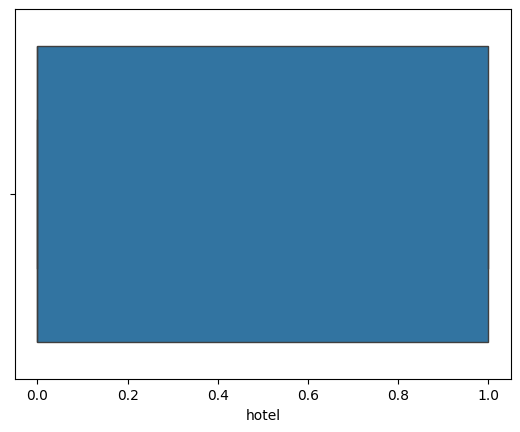

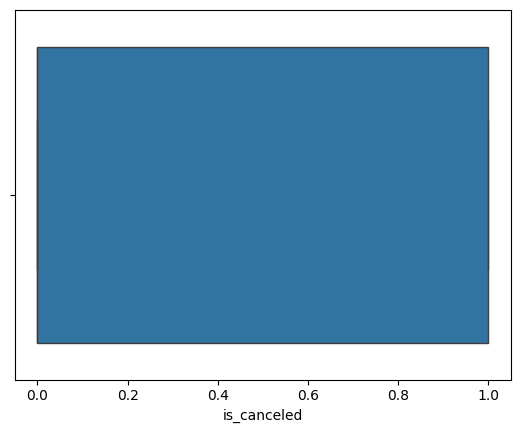

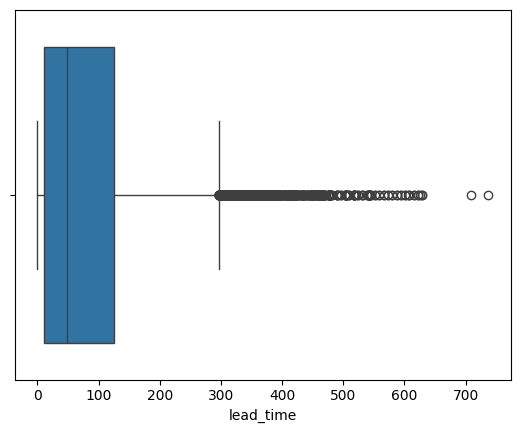

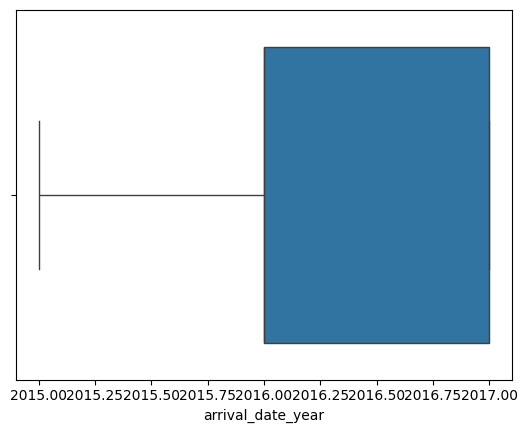

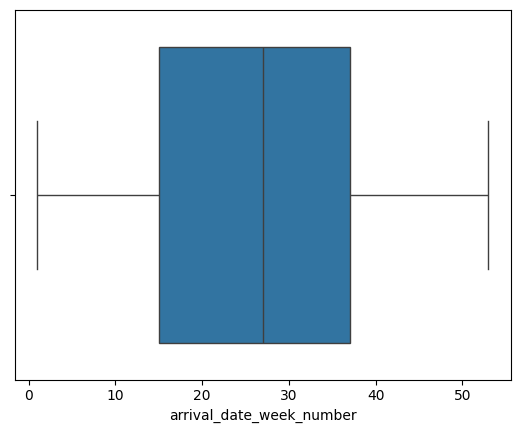

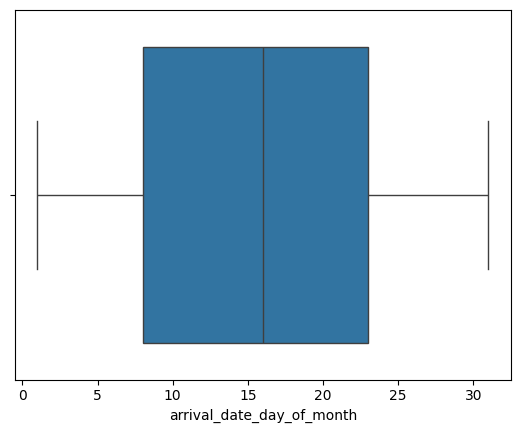

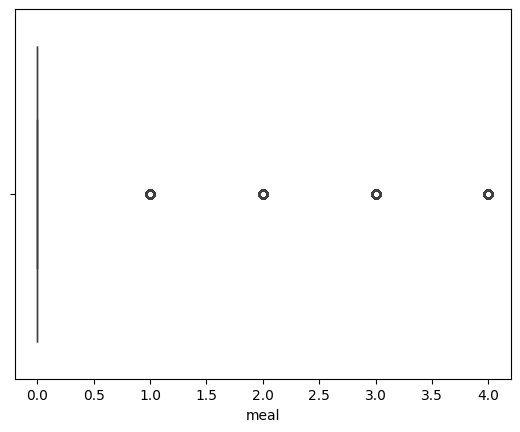

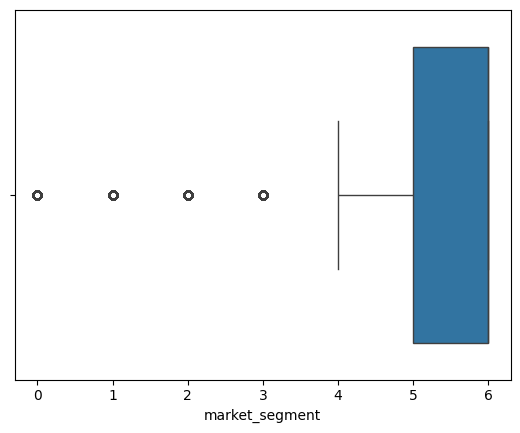

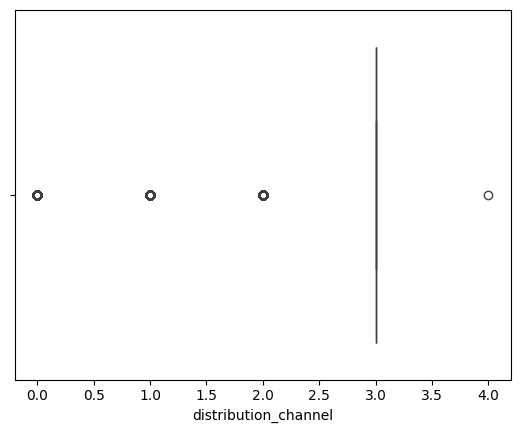

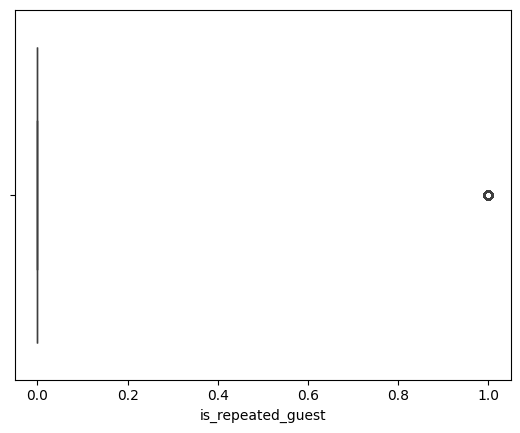

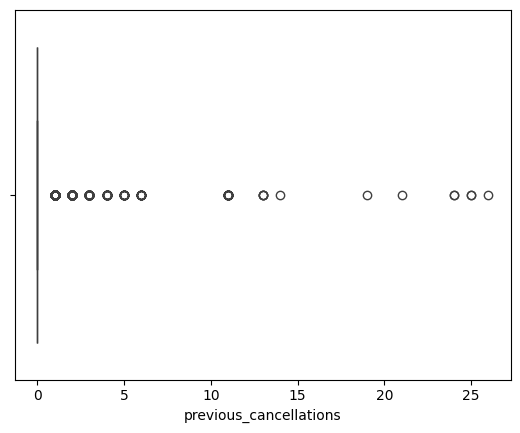

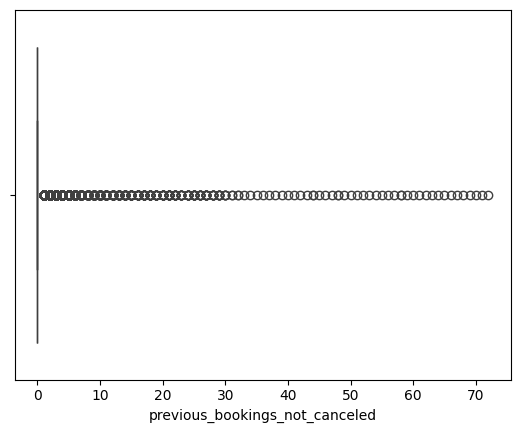

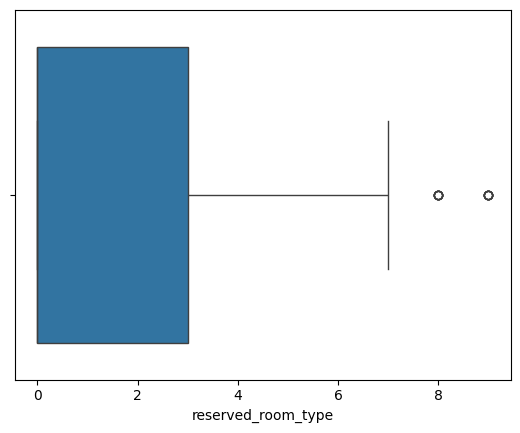

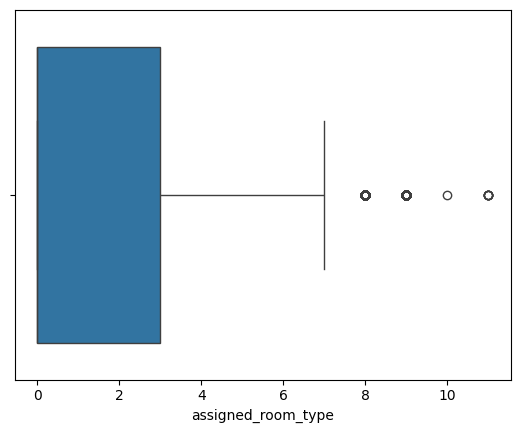

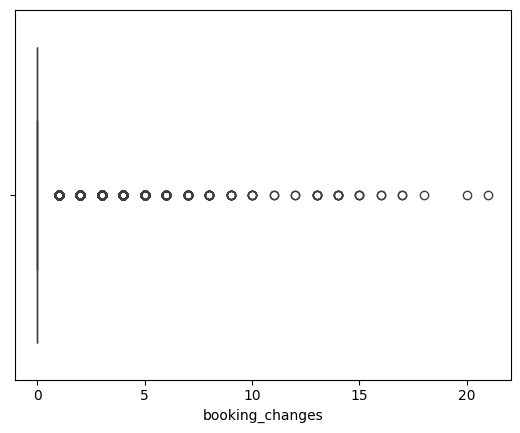

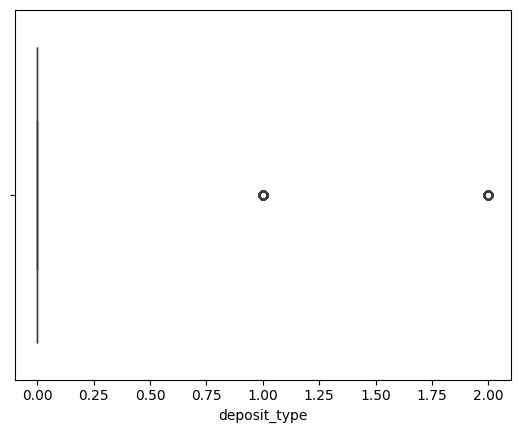

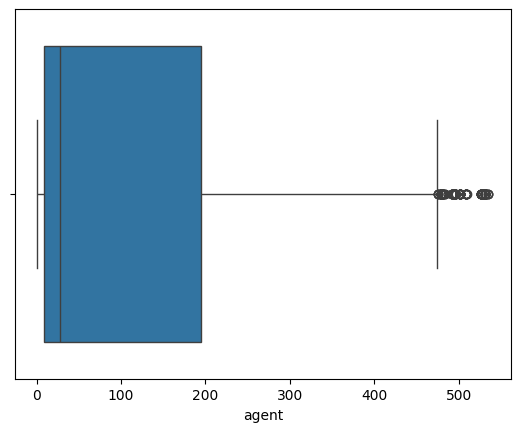

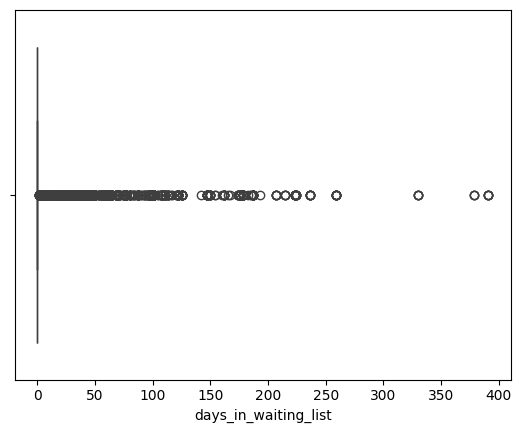

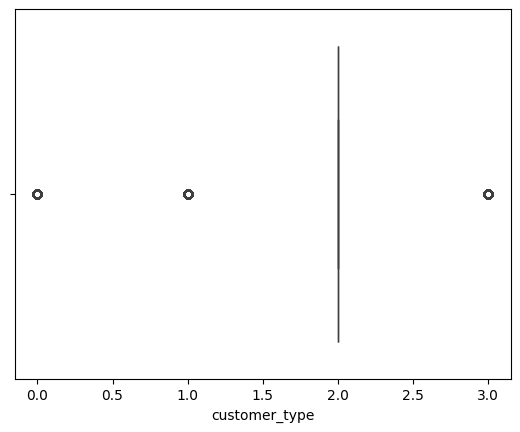

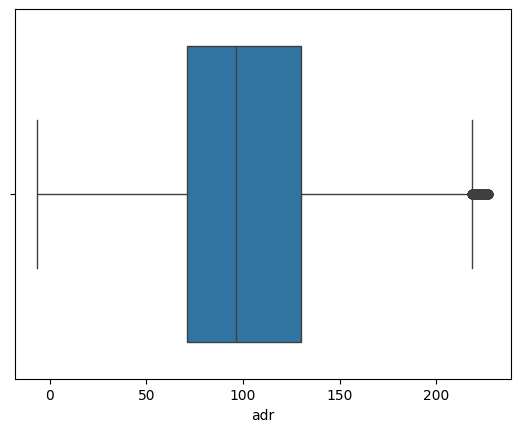

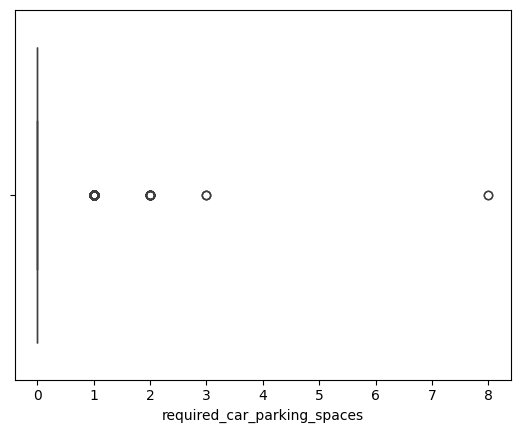

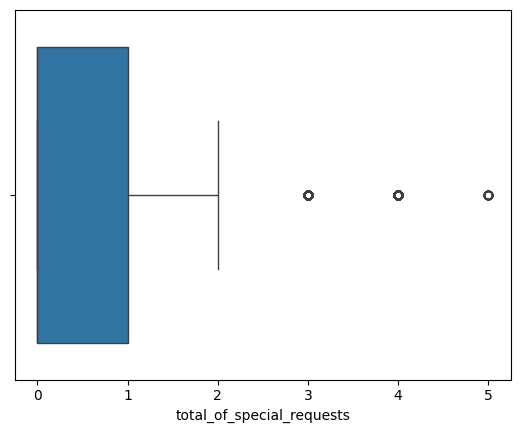

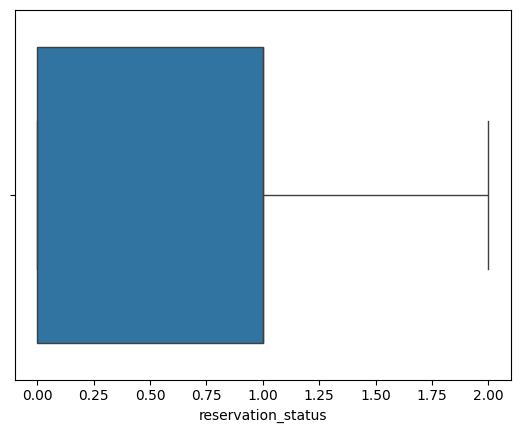

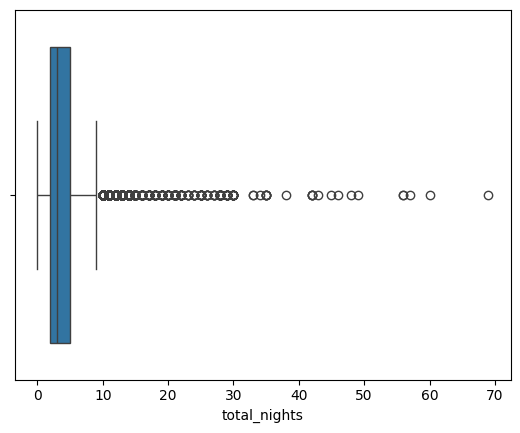

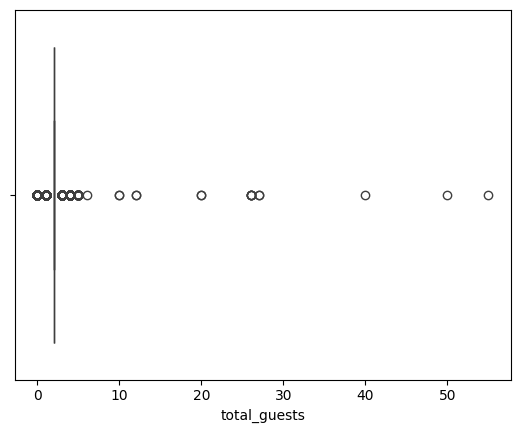

In [40]:
for ctr in num_df.select_dtypes(include='number').columns:
  sns.boxplot(data=num_df,x=ctr)
  plt.show()

<Axes: xlabel='adr'>

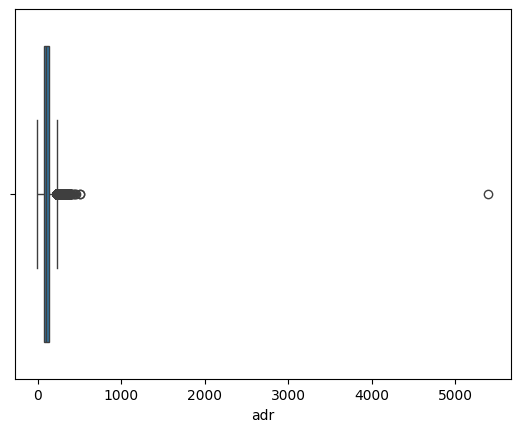

In [35]:
sns.boxplot(x=df['adr'])

In [36]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [37]:
df = remove_outliers_iqr(df, 'adr')


<Axes: xlabel='adr'>

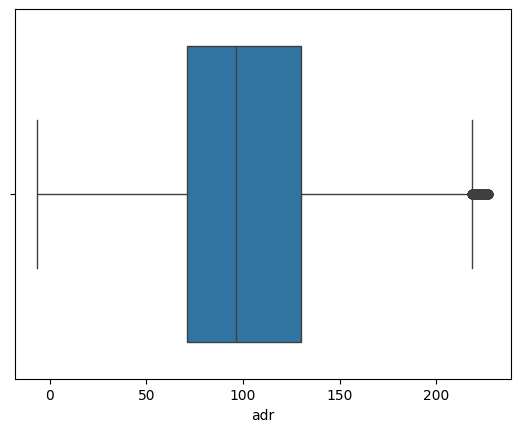

In [38]:
sns.boxplot(x=df['adr'])


In [44]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]


cols_to_clean = [ 'lead_time', 'total_nights']


df_cleaned = remove_outliers_iqr(df, cols_to_clean)


<Axes: xlabel='lead_time'>

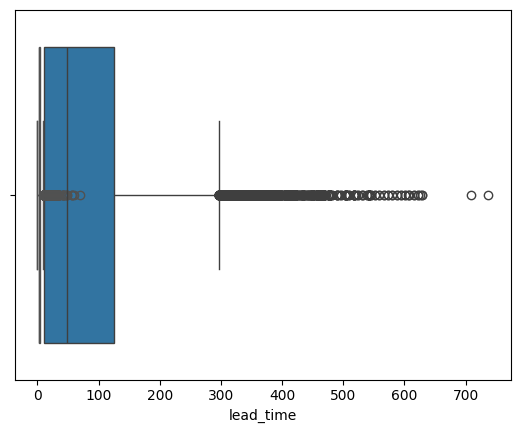

In [45]:
sns.boxplot(x=df['lead_time'])
sns.boxplot(x=df['total_nights'])

<Axes: xlabel='total_nights'>

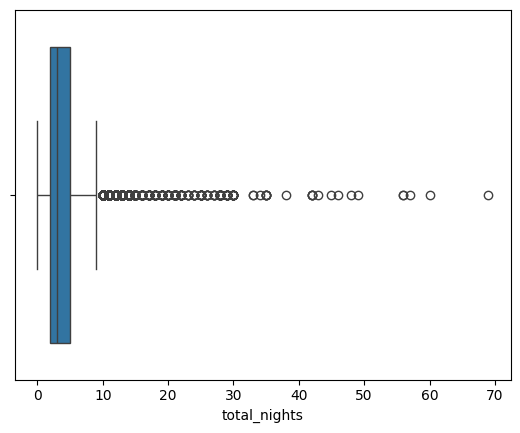

In [46]:
sns.boxplot(x=df['total_nights'])

In [51]:
df.describe()  # Check min, max, mean after outlier handling



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests
count,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.00000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878.000000,84878,84878,84878.000000,84878.000000
mean,0.379757,0.271625,80.160100,2016.199710,26.721047,15.798935,0.553394,5.071397,2.528076,0.039787,0.03121,0.188800,1.175852,1.594489,0.268856,0.014645,91.082246,0.768350,2.056116,101.793333,0.082024,0.693537,0.751867,2016-08-26 15:11:02.927966720,2016-09-10 06:47:51.076132608,3.614694,1.994957
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,2014-10-17 00:00:00,2015-07-01 00:00:00,0.000000,0.000000
25%,0.000000,0.000000,11.000000,2016.000000,15.000000,8.000000,0.000000,5.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,2.000000,71.100000,0.000000,0.000000,0.000000,2016-03-14 00:00:00,2016-03-28 00:00:00,2.000000,2.000000
50%,0.000000,0.000000,49.000000,2016.000000,27.000000,16.000000,0.000000,6.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,2.000000,96.555000,0.000000,0.000000,1.000000,2016-09-04 00:00:00,2016-09-17 00:00:00,3.000000,2.000000
75%,1.000000,1.000000,125.000000,2017.000000,37.000000,23.000000,0.000000,6.000000,3.000000,0.000000,0.00000,0.000000,3.000000,3.000000,0.000000,0.000000,195.000000,0.000000,2.000000,130.000000,0.000000,1.000000,1.000000,2017-02-27 00:00:00,2017-03-24 00:00:00,5.000000,2.000000
max,1.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,4.000000,6.000000,4.000000,1.000000,26.00000,72.000000,9.000000,11.000000,21.000000,2.000000,535.000000,391.000000,3.000000,227.000000,8.000000,5.000000,2.000000,2017-09-14 00:00:00,2017-08-31 00:00:00,69.000000,55.000000
std,0.485329,0.444800,86.461875,0.685871,13.812426,8.842161,1.084045,1.345511,0.947685,0.195458,0.37441,1.756745,1.762429,1.940488,0.724717,0.130017,104.267759,10.146252,0.536010,45.202116,0.278240,0.827729,0.458321,NaN,NaN,2.768018,0.768072


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84878 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           84878 non-null  int64         
 1   is_canceled                     84878 non-null  int64         
 2   lead_time                       84878 non-null  int64         
 3   arrival_date_year               84878 non-null  int64         
 4   arrival_date_month              84878 non-null  object        
 5   arrival_date_week_number        84878 non-null  int64         
 6   arrival_date_day_of_month       84878 non-null  int64         
 7   meal                            84878 non-null  int64         
 8   country                         84878 non-null  object        
 9   market_segment                  84878 non-null  int64         
 10  distribution_channel            84878 non-null  int64         
 11  is_rep

In [53]:
df.dropna(inplace=True)
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,total_nights,total_guests
0,1,0,342,2015,July,27,1,0,PRT,3,1,0,0,0,2,2,3,0,86.693382,0,2,0.00,0,0,1,2015-07-01,2015-07-01,0,2
1,1,0,737,2015,July,27,1,0,PRT,3,1,0,0,0,2,2,4,0,86.693382,0,2,0.00,0,0,1,2015-07-01,2015-07-01,0,2
2,1,0,7,2015,July,27,1,0,GBR,3,1,0,0,0,0,2,0,0,86.693382,0,2,75.00,0,0,1,2015-07-02,2015-07-01,1,1
3,1,0,13,2015,July,27,1,0,GBR,2,0,0,0,0,0,0,0,0,304.000000,0,2,75.00,0,0,1,2015-07-02,2015-07-01,1,1
4,1,0,14,2015,July,27,1,0,GBR,6,3,0,0,0,0,0,0,0,240.000000,0,2,98.00,0,1,1,2015-07-03,2015-07-01,2,2
6,1,0,0,2015,July,27,1,0,PRT,3,1,0,0,0,2,2,0,0,86.693382,0,2,107.00,0,0,1,2015-07-03,2015-07-01,2,2
7,1,0,9,2015,July,27,1,1,PRT,3,1,0,0,0,2,2,0,0,303.000000,0,2,103.00,0,1,1,2015-07-03,2015-07-01,2,2
8,1,1,85,2015,July,27,1,0,PRT,6,3,0,0,0,0,0,0,0,240.000000,0,2,82.00,0,1,0,2015-05-06,2015-07-01,3,2
9,1,1,75,2015,July,27,1,2,PRT,5,3,0,0,0,3,3,0,0,15.000000,0,2,105.50,0,0,0,2015-04-22,2015-07-01,3,2
10,1,1,23,2015,July,27,1,0,PRT,6,3,0,0,0,4,4,0,0,240.000000,0,2,123.00,0,0,0,2015-06-23,2015-07-01,4,2


# 2. Exploratory Data Analysis

1. Univariate Analysis

Analyze distribution of individual variables (one at a time)

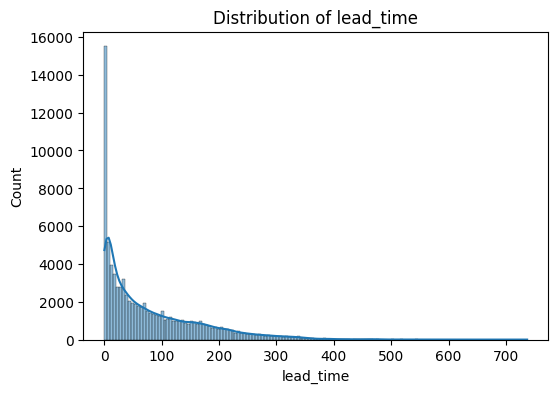

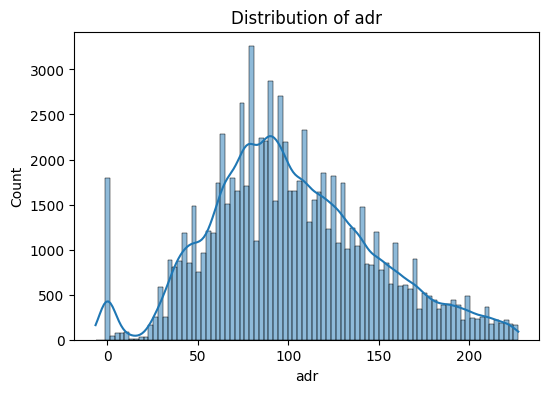

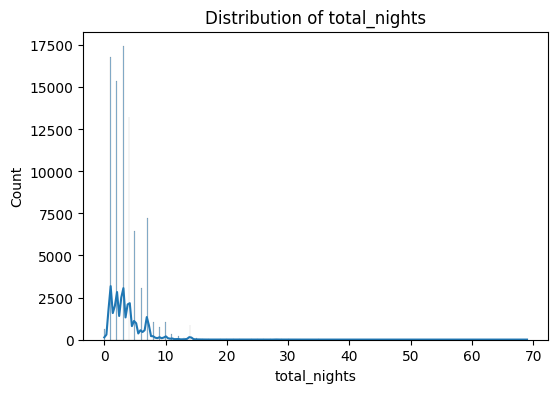

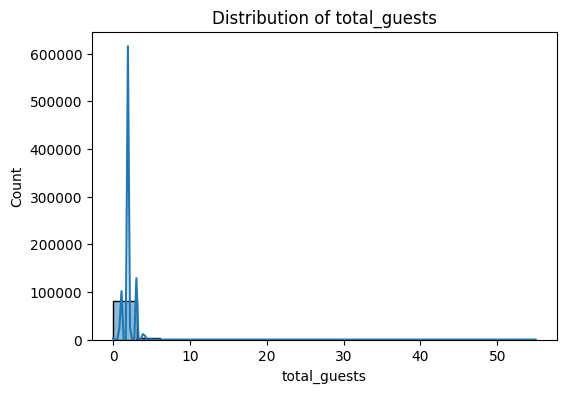

In [54]:
numerical_cols = ['lead_time', 'adr', 'total_nights', 'total_guests']
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


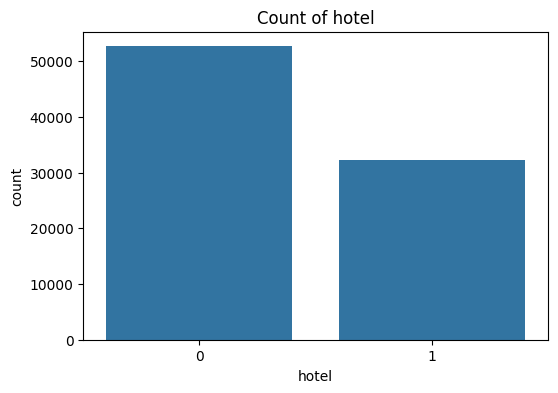

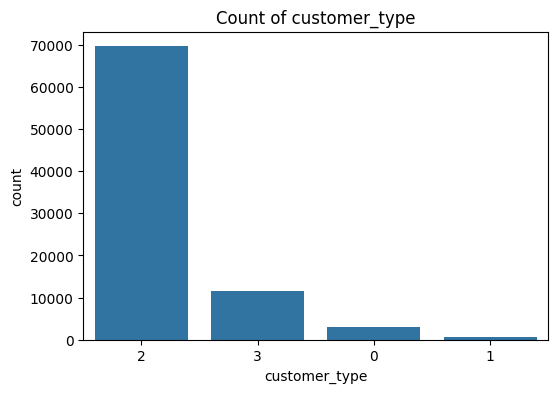

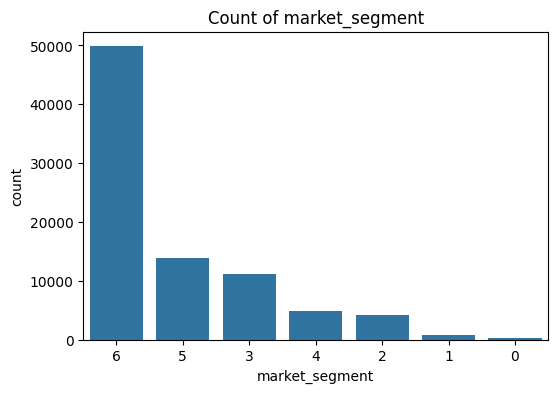

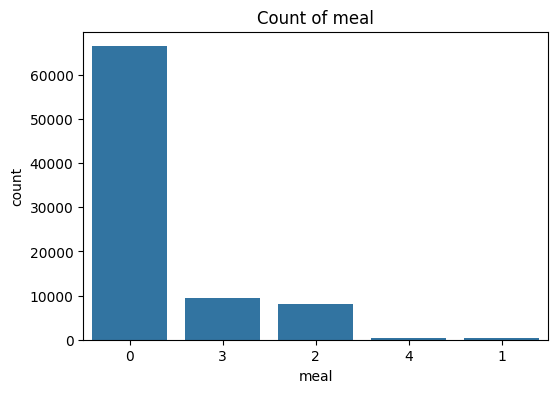

In [55]:
categorical_cols = ['hotel', 'customer_type', 'market_segment', 'meal']
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()


2. Bivariate Analysis

Relationship between two variables (e.g. numerical vs categorical)

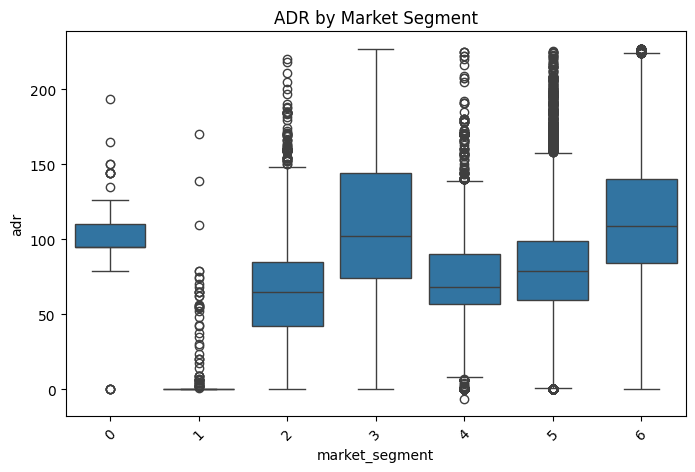

In [56]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='market_segment', y='adr')
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()


3. Multivariate Analysis


3+ variables at once

ADR by Market Segment and Distribution Channel

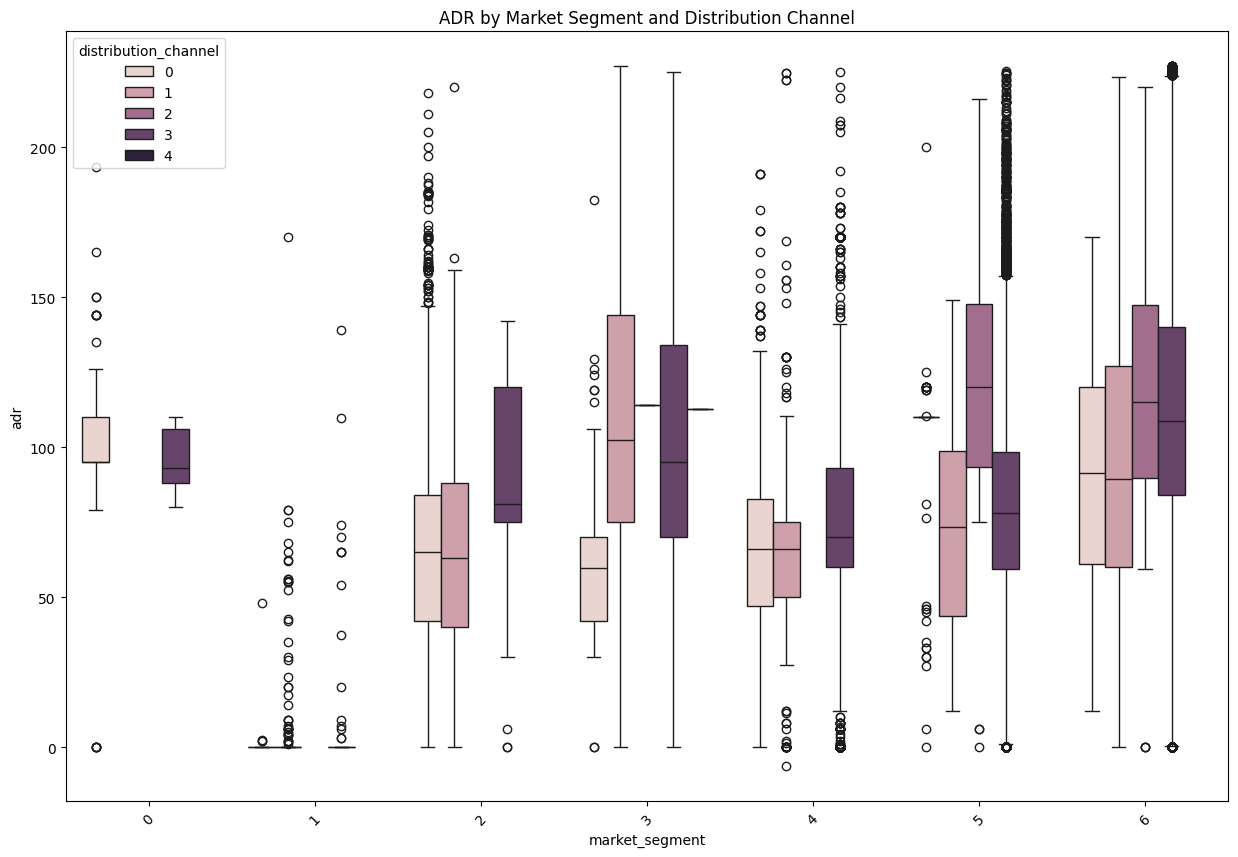

In [57]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, x='market_segment', y='adr', hue='distribution_channel')
plt.title('ADR by Market Segment and Distribution Channel')
plt.xticks(rotation=45)
plt.show()


Booking Type & Cancellation Rate

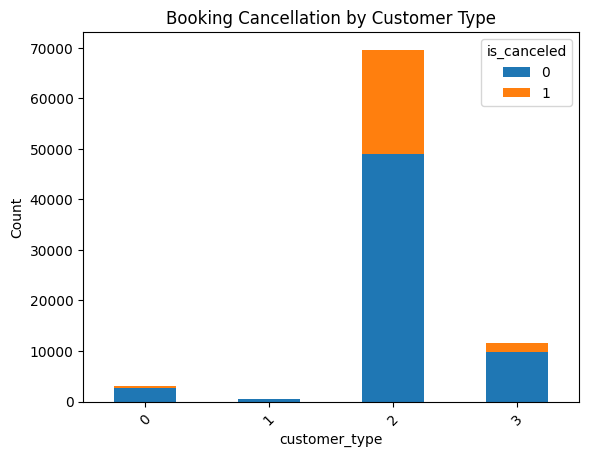

In [58]:
cancel_rate = df.groupby(['customer_type', 'is_canceled']).size().unstack()
cancel_rate.plot(kind='bar', stacked=True)
plt.title('Booking Cancellation by Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


4. Time-Series Analysis of Booking Trends

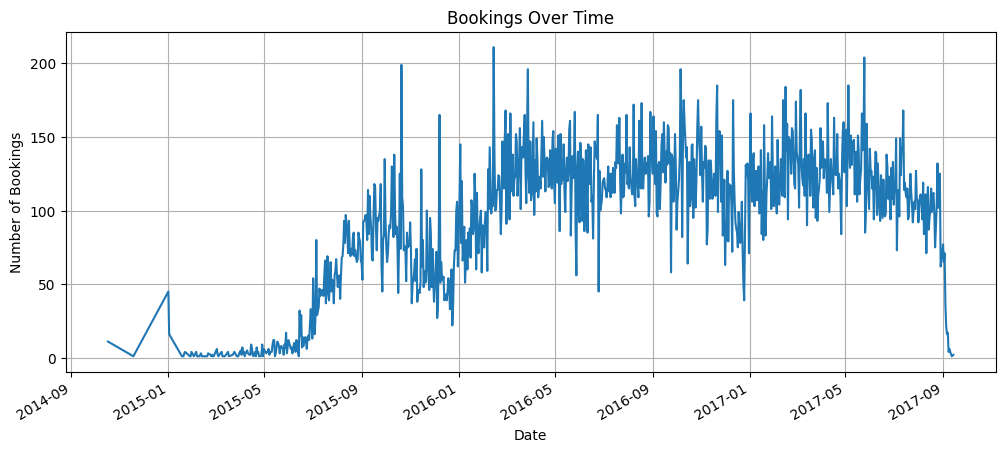

In [129]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Daily Booking Trend
daily_bookings = df.groupby('reservation_status_date').size()

plt.figure(figsize=(12, 5))
daily_bookings.plot()
plt.title('Bookings Over Time')
plt.ylabel('Number of Bookings')
plt.xlabel('Date')
plt.grid()
plt.show()

5. Guest Demographics & Country Distribution
  
   Top Countries

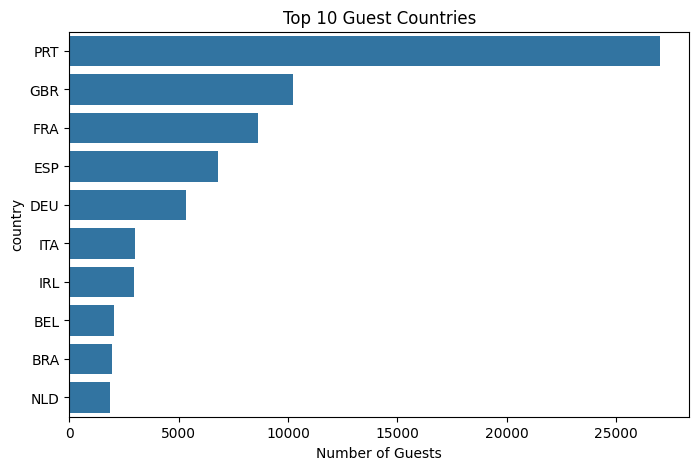

In [60]:
top_countries = df['country'].value_counts().nlargest(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Guest Countries')
plt.xlabel('Number of Guests')
plt.show()


6. Market Segment Share and ADR Comparison

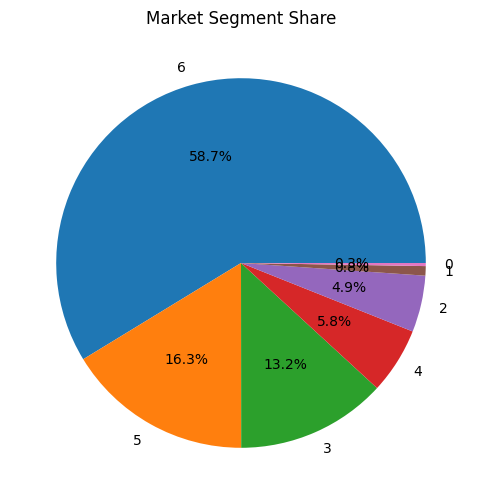

In [61]:
market_share = df['market_segment'].value_counts(normalize=True) * 100
market_share.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Market Segment Share')
plt.ylabel('')
plt.show()


ADR by Segment

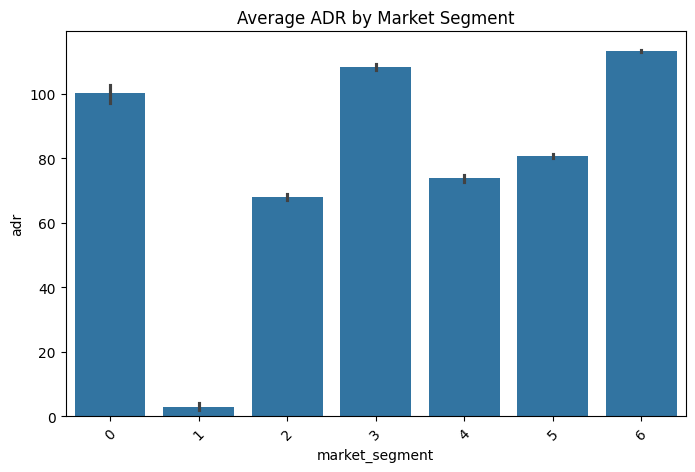

In [62]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='market_segment', y='adr', estimator='mean')
plt.title('Average ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()


7. Booking Lead Time Distribution Across Customer Types

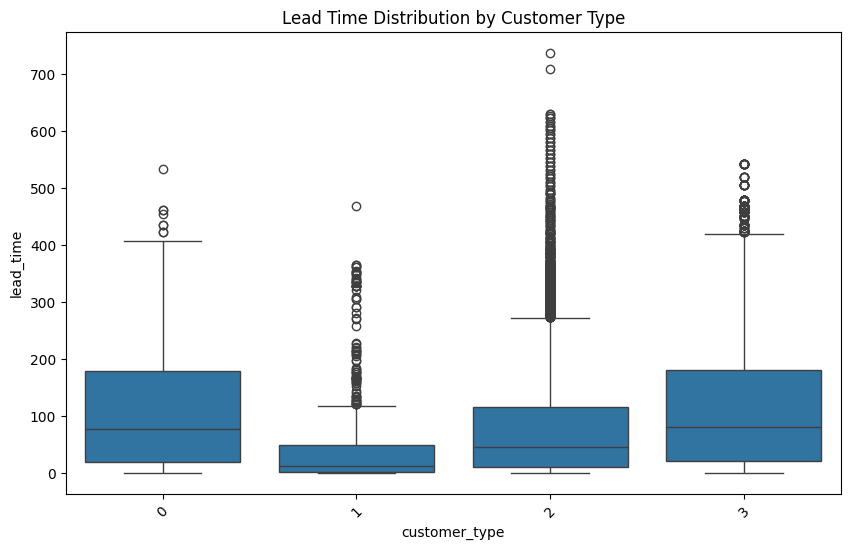

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='customer_type', y='lead_time')
plt.title('Lead Time Distribution by Customer Type')
plt.xticks(rotation=45)
plt.show()


# 3. Correlation Analysis


 Pearson/Spearman correlation matrix for numeric feature.

In [64]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
#Pearson Correlation
pearson_corr = numeric_df.corr(method='pearson')
#sepearman correlation
spearman_corr = numeric_df.corr(method='spearman')


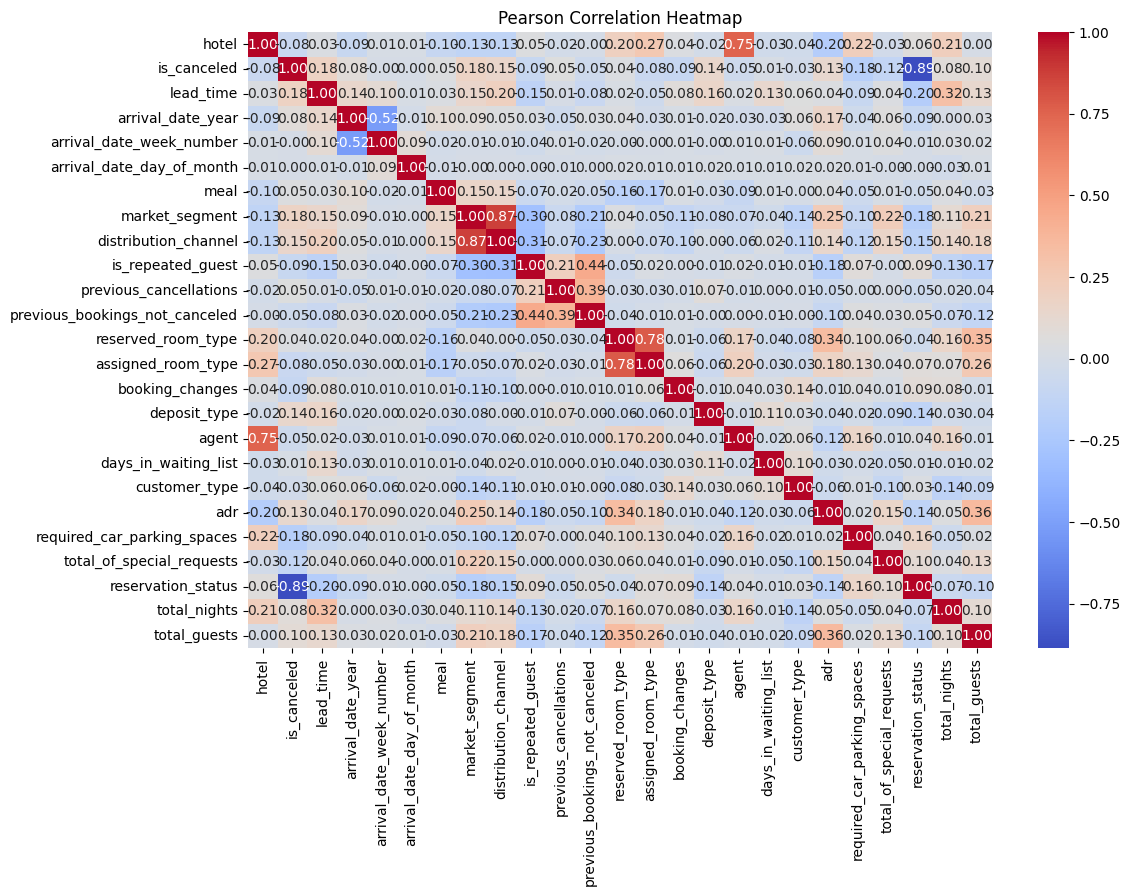

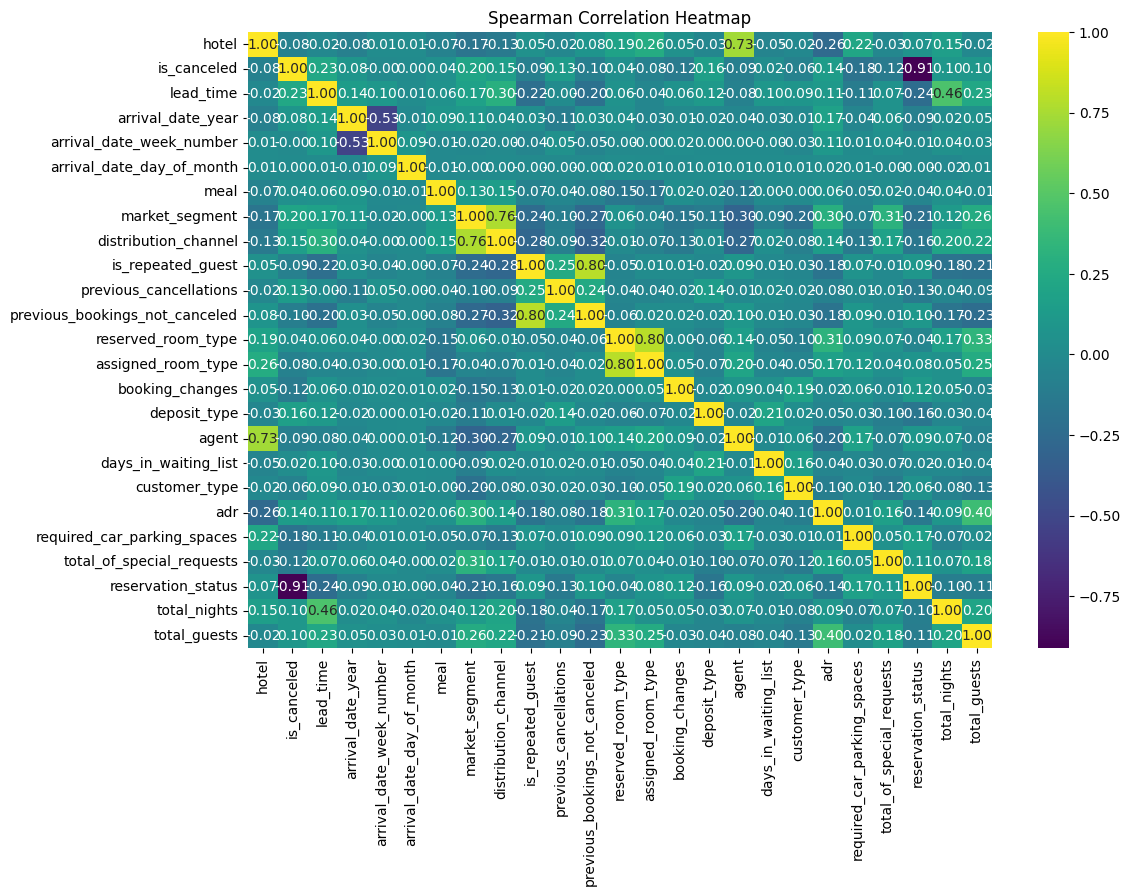

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(spearman_corr, annot=True, fmt='.2f', cmap='viridis')
plt.title('Spearman Correlation Heatmap')
plt.show()

Explore how strongly adr is influenced by lead time, special requests, and booking changes

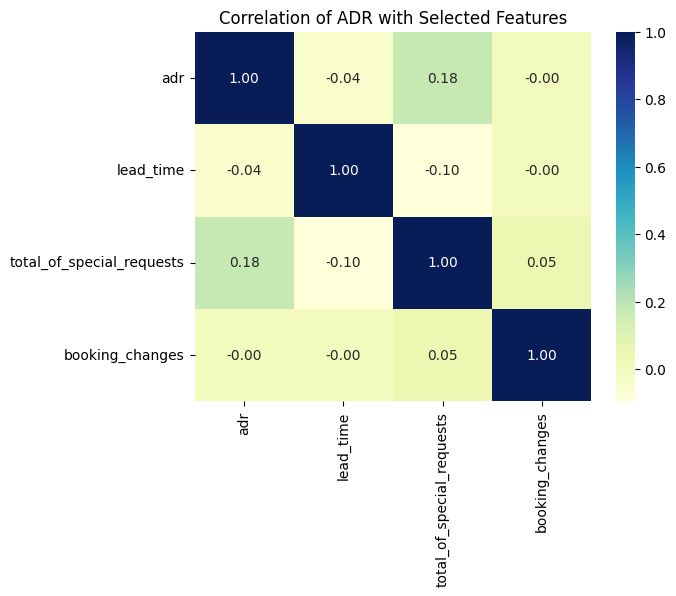

In [ ]:
features = ['adr', 'lead_time', 'total_of_special_requests', 'booking_changes']
adr_corr = numeric_df[features].corr(method='pearson')

sns.heatmap(adr_corr, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation of ADR with Selected Features')
plt.show()


In [ ]:
print("Correlation of ADR with lead_time:", adr_corr.loc['adr', 'lead_time'])
print("Correlation of ADR with special requests:", adr_corr.loc['adr', 'total_of_special_requests'])
print("Correlation of ADR with booking_changes:", adr_corr.loc['adr', 'booking_changes'])


Correlation of ADR with lead_time: -0.0447991703160111
Correlation of ADR with special requests: 0.17849050745752248
Correlation of ADR with booking_changes: -0.0012565743480314805


# 4.  Hypothesis Testing

1. Test: Difference in ADR between Online TA vs Direct

Hypothesis:

H₀ (null): No difference in ADR between Online TA and Direct.

H₁ (alt): ADR differs between Online TA and Direct.

In [126]:
print(df['distribution_channel'].unique())

[1 0 3 4 2]


In [127]:
from scipy.stats import ttest_ind

# Filter ADR values for each group
adr_online = df[df['dis_chanl'] == 'TA/TO']['adr']
adr_direct = df[df['dis_chanl'] == 'Direct']['adr']

# Perform t-test
t_stat, p_val = ttest_ind(adr_online, adr_direct, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → ADR differs between Online TA and Direct")
else:
    print("Fail to reject H0 → No significant difference in ADR")


T-statistic: -0.9671218405456852
P-value: 0.3334971778958855
Fail to reject H0 → No significant difference in ADR


H0 → Lead time influences room upgrade

H1 → Room upgrades are independent of lead time


In [128]:
import pandas as pd
from scipy.stats import chi2_contingency

df['room_upgraded'] = df['assigned_room_type'] != df['reserved_room_type']

df['lead_time_bin'] = pd.cut(df['lead_time'], bins=[0, 7, 30, 90, 180, df['lead_time'].max()],
                             labels=['<1 week', '1-4 weeks', '1-3 months', '3-6 months', '6+ months'])

contingency_table = pd.crosstab(df['lead_time_bin'], df['room_upgraded'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p)

if p < 0.05:
    print("Reject H0 → Room upgrades depend on lead time")
else:
    print("Fail to reject H0 → Room upgrades are independent of lead time")



Chi-Square Statistic: 1462.129378391963
Degrees of Freedom: 4
P-value: 0.0
Reject H0 → Room upgrades depend on lead time


H0: Average stay duration does not differ between customer types

H1 → No significant difference in stay duration

In [ ]:
from scipy.stats import f_oneway

# Create new feature: stay duration
df['stay_duration'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Group by customer_type
grouped = [group['stay_duration'] for name, group in df.groupby('customer_type')]

# Perform ANOVA
f_stat, p_val = f_oneway(*grouped)

print("F-statistic:", f_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject H0 → Stay duration differs by customer type")
else:
    print("Fail to reject H0 → No significant difference in stay duration")


F-statistic: 950.8773790523101
P-value: 0.0
Reject H0 → Stay duration differs by customer type


##5.  Key Business Questions


-  What influences ADR the most?

<Axes: >

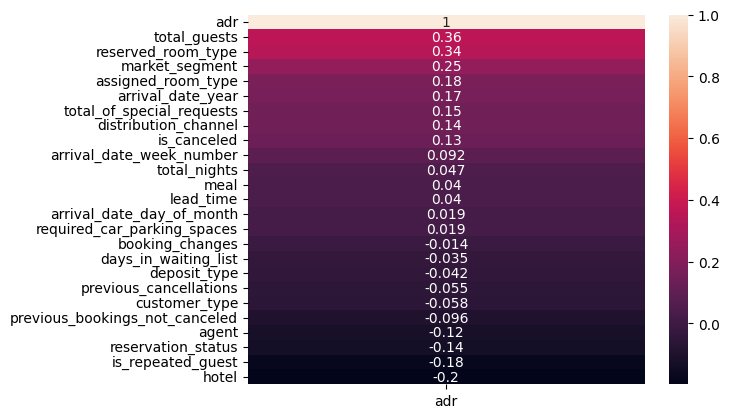

In [66]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix[['adr']].sort_values(by='adr', ascending=False), annot=True)

- Do guests who book earlier tend to request more changes?

<Axes: xlabel='lead_time', ylabel='booking_changes'>

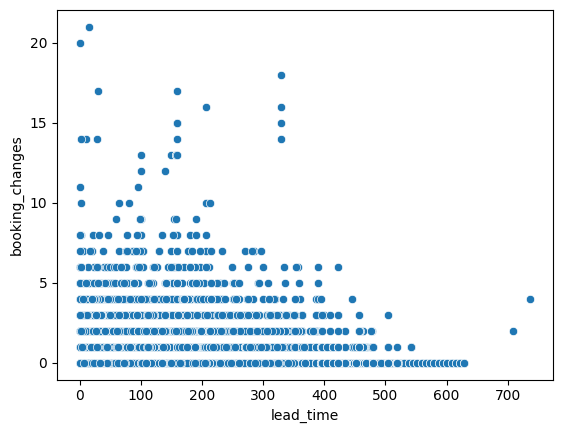

In [67]:
sns.scatterplot(data=df, x='lead_time', y='booking_changes')

- Are there pricing or booking differences across countries?

In [72]:
df.groupby('country')['adr'].mean().sort_values(ascending=False).head(10)

,adr
country,
UMI,200.000000
LAO,181.665000
NCL,175.500000
FRO,165.666667
GIB,157.710769
SLV,148.850000
PHL,147.710312
BHR,145.330000
MMR,145.000000


- Is there a pattern in room upgrades or reassignment?

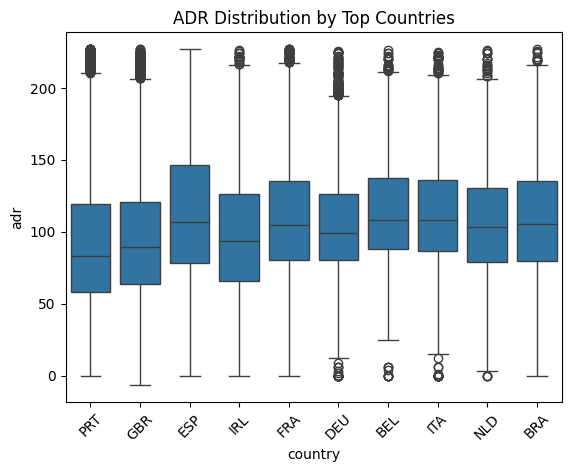

country
PRT    27008
GBR    10252
FRA     8642
ESP     6790
DEU     5334
ITA     2994
IRL     2981
BEL     2048
BRA     1956
NLD     1880
Name: count, dtype: int64


In [73]:
# ADR by country (top 10 countries by bookings)
top_countries = df['country'].value_counts().head(10).index
sns.boxplot(x='country', y='adr', data=df[df['country'].isin(top_countries)])
plt.title('ADR Distribution by Top Countries')
plt.xticks(rotation=45)
plt.show()

# Booking counts by country
print(df['country'].value_counts().head(10))

- Are reserved room types consistently matched with assigned room types?

Upgrade or reassignment rate: 15.28%


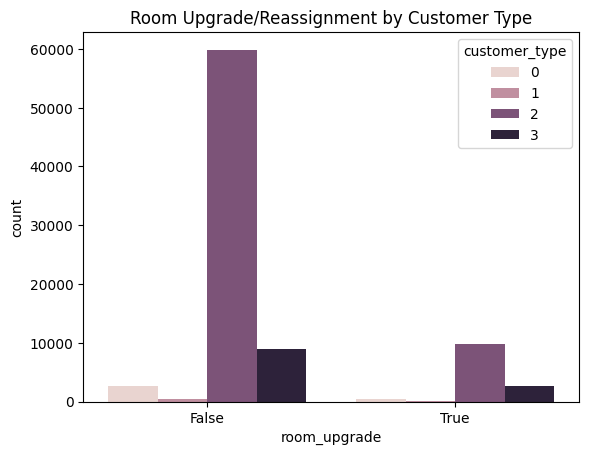

In [75]:
# Create a column if upgrade happened (assigned room better than reserved)
df['room_upgrade'] = df['assigned_room_type'] != df['reserved_room_type']

upgrade_rate = df['room_upgrade'].mean()
print(f'Upgrade or reassignment rate: {upgrade_rate:.2%}')

# Upgrade by customer type
sns.countplot(x='room_upgrade', hue='customer_type', data=df)
plt.title('Room Upgrade/Reassignment by Customer Type')
plt.show()


In [76]:
match_rate = (df['reserved_room_type'] == df['assigned_room_type']).mean()
match_rate

np.float64(0.8471806592992295)

- What are the most common guest demographics (e.g., group size, nationality)?

In [77]:
df['total_guests'].value_counts().head()

,count
total_guests,
2,56207
1,16001
3,9526
4,2889
0,166


- Are there patterns in guest types (e.g., transient vs. corporate) that influence booking behavior?

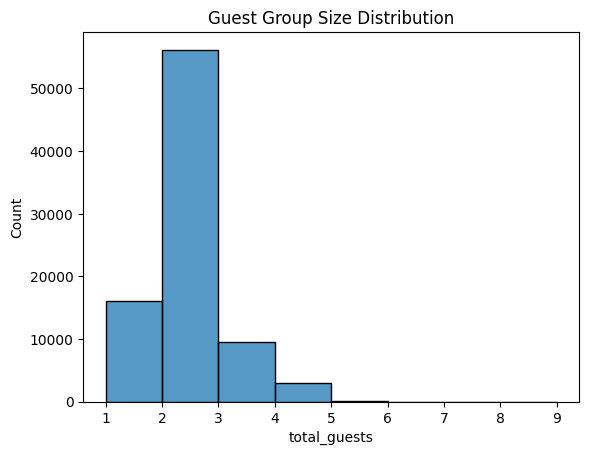

country
PRT    27008
GBR    10252
FRA     8642
ESP     6790
DEU     5334
ITA     2994
IRL     2981
BEL     2048
BRA     1956
NLD     1880
Name: count, dtype: int64


In [78]:
# Group size
# df['group_size'] = df['adults'] + df['children'] + df['babies']
sns.histplot(df['total_guests'], bins=range(1,10))
plt.title('Guest Group Size Distribution')
plt.show()

# Nationality top 10
print(df['country'].value_counts().head(10))

- How does booking lead time vary across customer types and countries?

<Axes: xlabel='customer_type', ylabel='adr'>

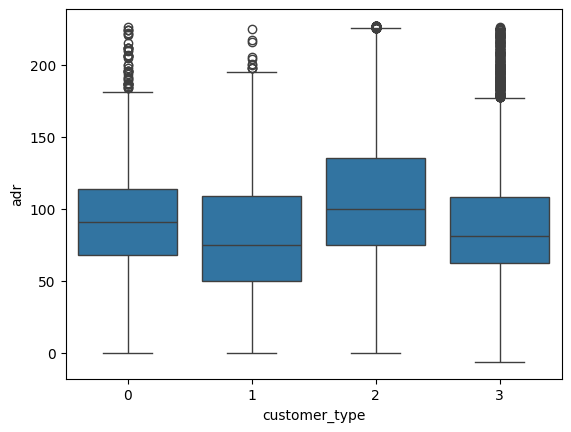

In [79]:
sns.boxplot(x='customer_type', y='adr', data=df)

In [82]:
# df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_nights'].head()

,total_nights
0,0
1,0
2,1
3,1
4,2


- Are longer lead times associated with fewer booking changes or cancellations?

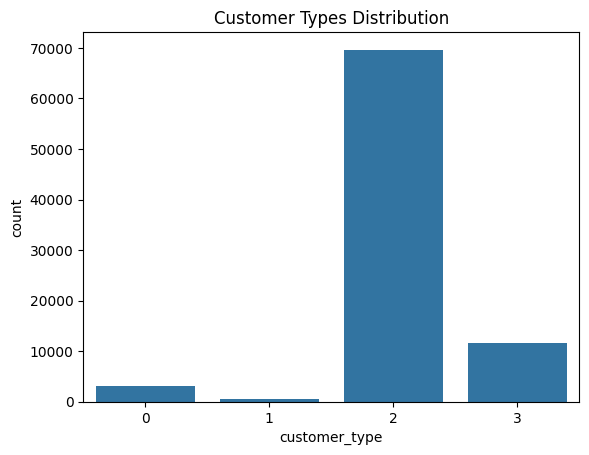

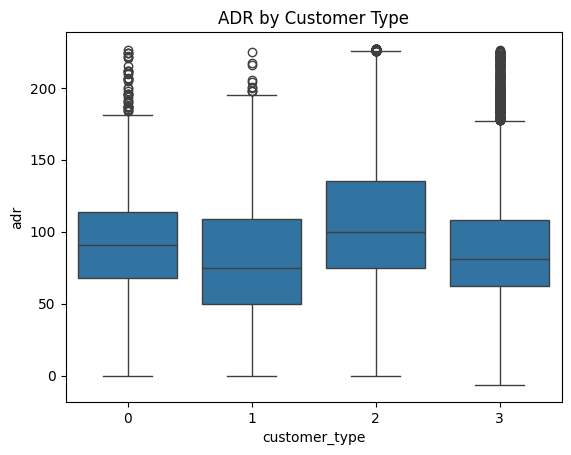

In [83]:
sns.countplot(x='customer_type', data=df)
plt.title('Customer Types Distribution')
plt.show()

# ADR by customer type
sns.boxplot(x='customer_type', y='adr', data=df)
plt.title('ADR by Customer Type')
plt.show()

- What is the typical duration of stay, and how does it vary by customer type or segment?


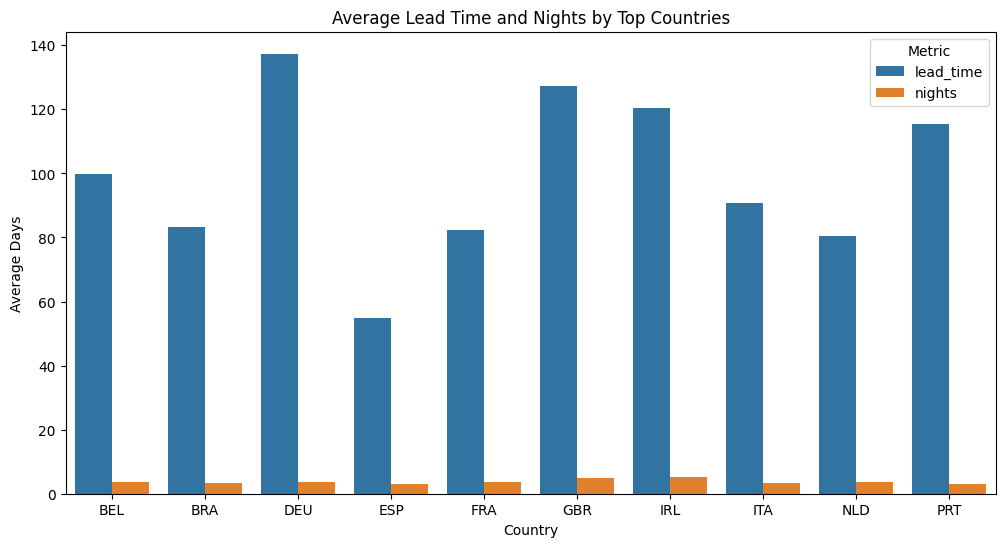

In [134]:
df['nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
top_country_avgs = df[df['country'].isin(top_countries)].groupby('country')[['lead_time', 'nights']].mean().reset_index()

# Reshape for grouped bar chart
melted = pd.melt(top_country_avgs, id_vars='country', value_vars=['lead_time', 'nights'],
                 var_name='Metric', value_name='Average Days')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='Average Days', hue='Metric', data=melted)
plt.title('Average Lead Time and Nights by Top Countries')
plt.xlabel('Country')
plt.ylabel('Average Days')
plt.legend(title='Metric')
plt.show()

- How often are guests upgraded or reassigned to a different room type?


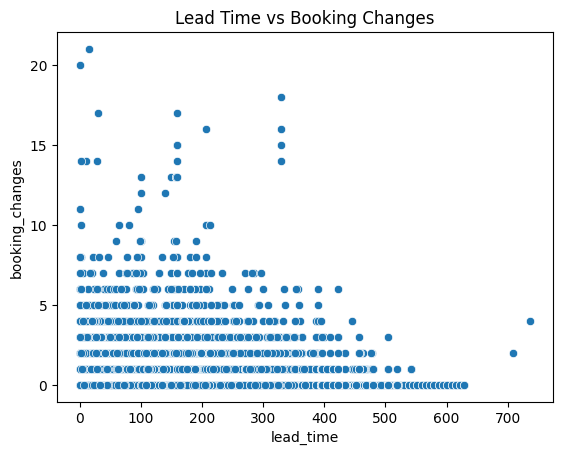

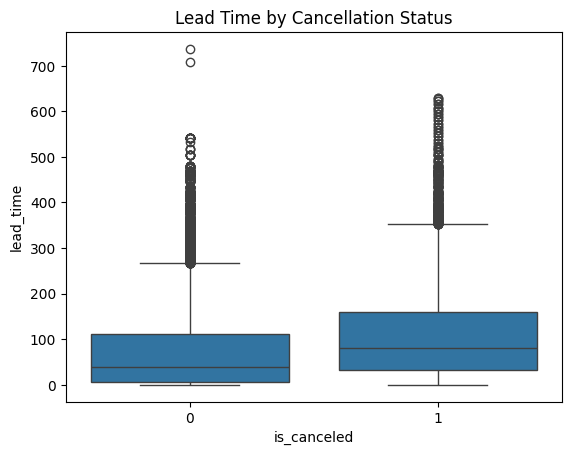

In [85]:
sns.scatterplot(x='lead_time', y='booking_changes', data=df)
plt.title('Lead Time vs Booking Changes')
plt.show()

sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time by Cancellation Status')
plt.show()

- Are guests who make special requests more likely to experience booking changes or longer stays?


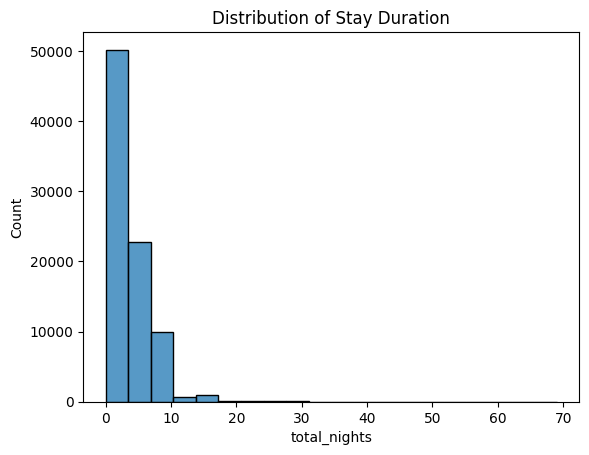

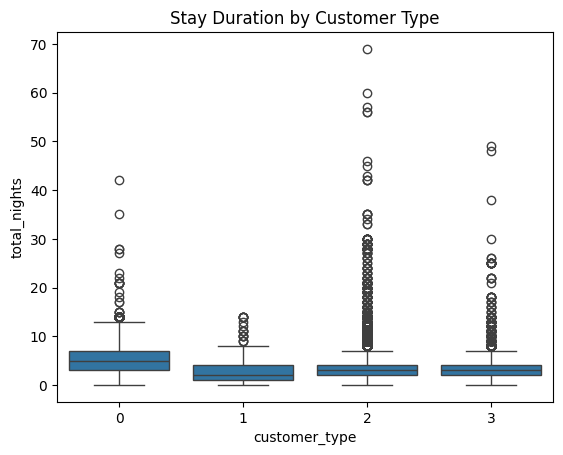

In [86]:
# df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
sns.histplot(df['total_nights'], bins=20)
plt.title('Distribution of Stay Duration')
plt.show()

sns.boxplot(x='customer_type', y='total_nights', data=df)
plt.title('Stay Duration by Customer Type')
plt.show()

- What factors are most strongly associated with higher ADR?


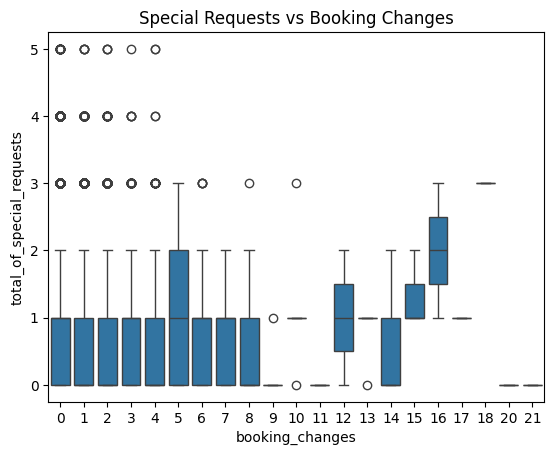

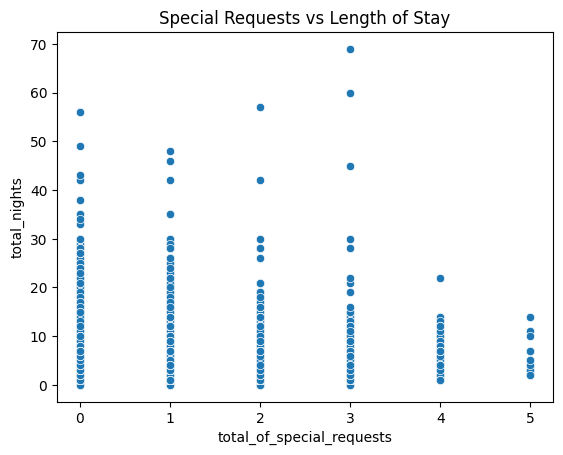

In [87]:
sns.boxplot(x='booking_changes', y='total_of_special_requests', data=df)
plt.title('Special Requests vs Booking Changes')
plt.show()

sns.scatterplot(x='total_of_special_requests', y='total_nights', data=df)
plt.title('Special Requests vs Length of Stay')
plt.show()

- Are there customer types or segments consistently contributing to higher revenue?


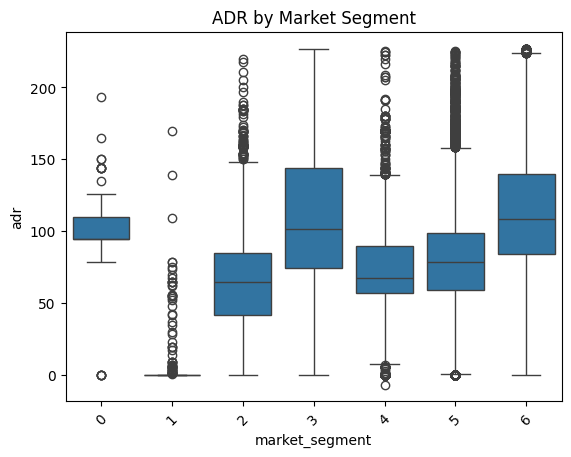

Cancellation Rate by Distribution Channel:
 distribution_channel
0    0.127517
1    0.145393
2    0.198895
3    0.305821
4    0.000000
Name: is_canceled, dtype: float64


In [88]:
sns.boxplot(x='market_segment', y='adr', data=df)
plt.title('ADR by Market Segment')
plt.xticks(rotation=45)
plt.show()

booking_consistency = df.groupby('distribution_channel')['is_canceled'].mean()
print("Cancellation Rate by Distribution Channel:\n", booking_consistency)

- Are guests with higher ADR more likely to request special services or make booking modifications?


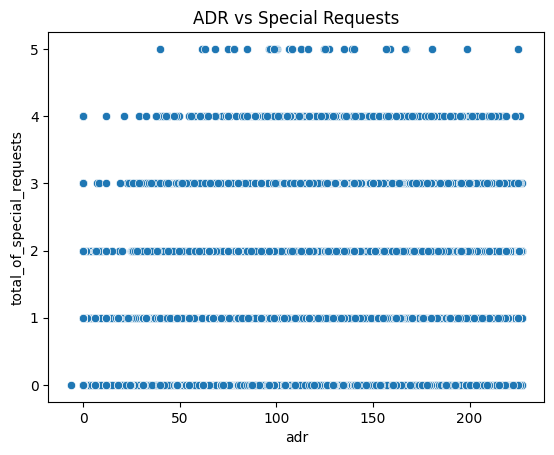

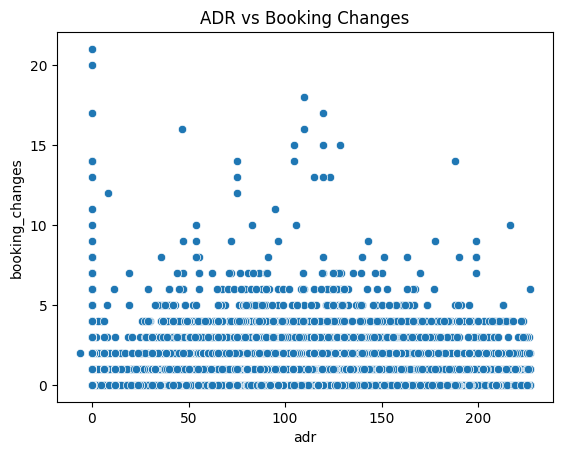

In [89]:
sns.scatterplot(x='adr', y='total_of_special_requests', data=df)
plt.title('ADR vs Special Requests')
plt.show()

sns.scatterplot(x='adr', y='booking_changes', data=df)
plt.title('ADR vs Booking Changes')
plt.show()

- Are guests who make booking changes more likely to request additional services or cancel?




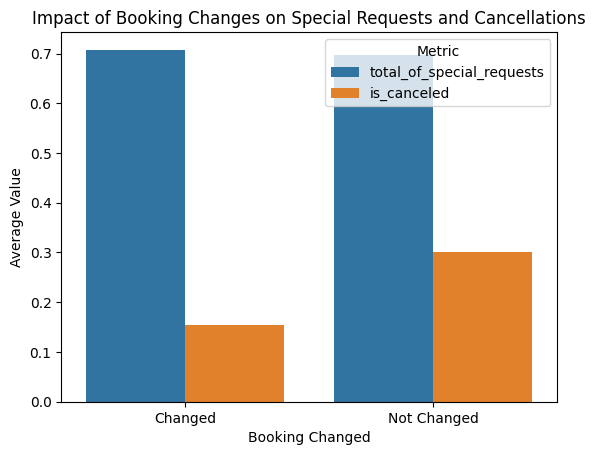

In [131]:
df['booking_changed'] = df['booking_changes'].apply(lambda x: 'Changed' if x > 0 else 'Not Changed')

# Group by booking_changed and calculate mean values
grouped_data = df.groupby('booking_changed')[['total_of_special_requests', 'is_canceled']].mean().reset_index()

# Melt the data for grouped bar plot
melted_data = pd.melt(grouped_data, id_vars='booking_changed',
                      value_vars=['total_of_special_requests', 'is_canceled'],
                      var_name='Metric', value_name='Average Value')

# Plot
sns.barplot(x='booking_changed', y='Average Value', hue='Metric', data=melted_data)
plt.title('Impact of Booking Changes on Special Requests and Cancellations')
plt.xlabel('Booking Changed')
plt.ylabel('Average Value')
plt.show()